In [1]:
!nvidia-smi #Check the version of NVIDIA software to use GPUs after installing it: "https://docs.nvidia.com/gameworks/content/developertools/desktop/install_nvidia_display_driver.htm"

Wed Mar 22 12:44:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P0    15W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import Torch Model

In [1]:
# import and install pytorch to run yolov5
!pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu117

Looking in indexes: https://download.pytorch.org/whl/nightly/cu117


## Import YOLOv5

In [25]:
# Cloning model from github repositories 
!git clone https://github.com/ultralytics/yolov5 

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [26]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch 
from matplotlib import pyplot as plt 
import numpy as np
import cv2

In [2]:
model1 = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\natha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-22 Python-3.9.13 torch-2.1.0.dev20230322+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 8.17MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model1 # check if the model1 is succesfully imported 

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# For images

In [4]:
# Import images to check the model detection from cocos database
img = "Teddy_Bear.jpg"  # read jpg files or, Path, PIL, OpenCV, numpy, list

In [5]:
# Inference
results = model1(img)

# Results
results.print()

image 1/1: 358x379 1 teddy bear
Speed: 57.7ms pre-process, 139.4ms inference, 59.8ms NMS per image at shape (1, 3, 608, 640)


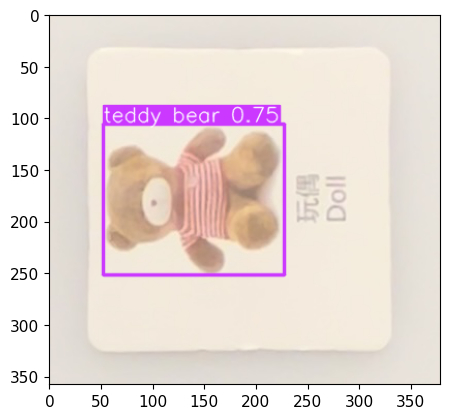

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render())) # use numpy squeeze to remove one dimensional entry (results)
plt.show()

# For Videos

In [8]:
import cv2 #open computer visual library 

cap = cv2.VideoCapture("Teddy_Bear.MOV") # Similar to images you can import pre-recorded videos for the model to detect. 

def rescale(frame, scale = 0.1): #scale down video
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimension = (width, height)
    return cv2.resize(frame,dimension,interpolation=cv2.INTER_AREA)
while True:
    ret, frame = cap.read()
    frame_resize = rescale(frame)
    # Make detections 
    results = model1(frame_resize) #import machine learning model
    print(results)
    #blob = cv2.dnn.bloblFromImage(frame,scalefactor = 1/255, size = input_size, swapRB = True)
    cv2.imshow('Video', np.squeeze(results.render()))
    if cv2.waitKey(1) & 0xFF == ord('q'): # this is the key "q" used to escape the while look and clode out of the CV
        break

cap.release()
cv2.destroyAllWindows()

image 1/1: 384x216 (no detections)
Speed: 3.5ms pre-process, 94.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 2.5ms pre-process, 61.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 4.6ms pre-process, 60.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 3.5ms pre-process, 61.4ms inference, 2.4ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 3.0ms pre-process, 60.2ms inference, 2.5ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 3.5ms pre-process, 58.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 1 tv
Speed: 2.0ms pre-process, 58.7ms inference, 4.4ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 384x216 (no detections)
Speed: 4.0ms pre-process, 57.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 384)
image 1/1: 

# For Real Time

In [25]:
# Connect to the outter video camera

#classes = ["toothbrush"]
cap = cv2.VideoCapture(0) #1 is for the outside camera, 0 is for the laptop camera

while cap.isOpened():
    ret, frame = cap.read()
    h,w = frame.shape[:2] #expected value must be two for hight and width
    pixels = np.array([(x,y) for y in range(h) for x in range(w) if x%50== 0 and y%50==0]) # x is the horizontal distance between points and y is the vertival distance 
    
    # create pixel coordinates
    for coord in pixels: 
        x,y = coord
        text = f"({x}, {y})"
        cv2.putText(frame,"+",(x,y),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0),1) # "+" icon used as coordinates, 0.1 is the scale and (0,255,0),1 is the color with the infill amount
    # Make detections 
    results = model1(frame) #import machine learning model
    print(results)
    
    cv2.imshow('ML Model 1', np.squeeze(results.render())) #show/render the video in real time
        
    if cv2.waitKey(10) & 0xFF == ord('q'): # key to quit out of the video 
        break
cap.release() #resealse video camera 
cv2.destroyAllWindows() #quit out of the video frame

image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 7.2ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 10.7ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.3ms pre-process, 10.4ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 7.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 6.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 11.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 7.4ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.3ms pre-process, 8.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image

# Train from Scartch 

In [4]:
pip install -U ultralytics

     ------------------------------------ 529.2/529.2 kB 664.5 kB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.55
    Uninstalling ultralytics-8.0.55:
      Successfully uninstalled ultralytics-8.0.55
Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip install roboflow

In [7]:
import cv2
from roboflow import Roboflow

rf = Roboflow(api_key="h4oqDKpVW1IRBvkX8X9k")
project = rf.workspace().project("yolo-2v2pu")
model2 = project.version(1).model

classes = ['triangle','circle']

input_size = (640,640)
# Connect to the outter video camera
cap = cv2.VideoCapture(0) #1 is for the outside camera, 0 is for the laptop camera
while True:
    ret, frame = cap.read()
    h,w = frame.shape[:2]
    pixels = np.array([(x,y) for y in range(h) for x in range(w) if x% 50 == 0 and y%50==0])
    
    for coord in pixels: 
        x,y = coord
        text = f"({x}, {y})"
        cv2.putText(frame,"+",(x,y),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0),1)
    #blob = cv2.dnn.blobFromImage(frame,scalefactor=1/255, size = input_size,swapRB = True)
    # Make detections 
    results = model2.predict(frame, confidence=40, overlap=30).json() #import machine learning model
    print(results)
    
    dimen = results["image"]
    
    if len(results['predictions']) != 0:
        width = int(results["predictions"][0]["width"])
        height = int(results["predictions"][0]["height"])
        x1 = int(results["predictions"][0]["x"]) - int(width/2)
        y2 = int(results["predictions"][0]["y"]) - int(height/2)
        x2 = int(results["predictions"][0]["x"]) + int(width/2)
        y2 = int(results["predictions"][0]["x"]) + int(height/2)
        cv2.rectangle(frame, (x1,y1),(x2,y2), (0,255,0), 2)
        print((x1,y1),(x2,y2))
        
    
    cv2.imshow('ML Model 2', frame) #show/render the video in real time
        
    if cv2.waitKey(10) & 0xFF == ord('q'): # key to quit out of the video 
        break
cap.release() #resealse video camera q
cv2.destroyAllWindows() #quit out of the video frame

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}
{'predictions': [], 'image': {'width': '0', 'height': '0'}}


# Python API for myCobot

In [10]:
!pip install pymycobot --upgrade

     ---------------------------------------- 57.3/57.3 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: pymycobot
    Found existing installation: pymycobot 3.0.8
    Uninstalling pymycobot-3.0.8:
      Successfully uninstalled pymycobot-3.0.8


In [9]:
import cv2
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import time
import os,sys
import math
import serial
import serial.tools.list_ports
from pymycobot.mycobot import MyCobot
from pymycobot.genre import Coord

In [476]:
#mc = MyCobot("COM3", 921600) # (port,baud)
mc = MyCobot("COM3", 115200) # (port,baud) # Must run once and then you commment it out. Otherwise an error will pop but it will still run.

#robot_m5 = os.popen("ls/dev/ttyUSB*").readline()[:-1]

In [64]:
# Test if mycobot works by testing LEDs

#mc = MyCobot("COM3", 115200) # (port,baud)
i = 1
#loop 7 times
while i > 0:                            
    mc.set_color(0,0,255) #blue light on
    time.sleep(1)    #wait for 1 seconds                
    mc.set_color(255,0,0) #red light on
    time.sleep(1)    #wait for 1 seconds
    mc.set_color(0,255,0) #green light on
    time.sleep(1)    #wait for 1 seconds
    i -= 1

In [211]:
# Determine whether the robot arm is powered or not, and if there is no power supply, 
if not mc.is_power_on():
 # Power the robot arm
 mc.power_on()

In [477]:
mc.release_all_servos() # freely be able to move the robot to the derise location.

In [361]:
mc.jog_stop() # lock the servos after the desire location is met

In [42]:
# Gets the angle and posture of the current head
#coords = mc.get_coords()
#print(coords)  

[143.8, 44.5, 290.1, -174.66, -0.14, -26.73]


In [141]:
#mc.send_coords([115.2, -61.0, 238.0, -147.6, 10.75, -83.21], 80, 1) # send_coords([x,y,z,rx,ry,rz],speed,model) 

In [362]:
#Get the coordinates of the current location
angle_datas = mc.get_angles() # -180 to 180 
print(angle_datas)

[-34.27, -24.34, -105.82, 43.41, 2.28, 13.88]


# Bin A

In [402]:
# clockwise is (-) mycobot angles are from decending order
# mm/s with a range from 0-100 
# clockwise is (-) 
# mycobot angles orders are from base to tip

# Position 0
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

In [403]:
# Position 1 
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [404]:
# Open sunction pump
def pump_on():
 # Let 2 work
 mc.set_basic_output(2, 0) #The ports must match with the numbering
 # Let 5 work
 mc.set_basic_output(5, 0)
    
# Stop sunction pump
def pump_off():
 # Let 2 stop working
 mc.set_basic_output(2, 1) # 2 it the port number for the pump
 # Let 5 stop working
 mc.set_basic_output(5, 1)
    
# Pump coordinates (Position 2)
mc.send_angles([15.99, -50.71, -120.76, 87.01, 5.18, 14.32],30)

In [405]:
pump_on()
time.sleep(3)

In [406]:
# Position 3 
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [407]:
# Bin A coordinates (Position 4)
mc.send_angles([68.2, -30.05, -114.96, 67.41, 2.98, 14.23],40)

In [408]:
pump_off()
time.sleep(3)

In [409]:
# Position 5
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [410]:
# Position 6
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

# Bin B

In [421]:
# Position 0
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

In [422]:
# Position 1
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [423]:
# Position 2
mc.send_angles([15.99, -50.71, -120.76, 87.01, 5.18, 14.32],30)

In [424]:
pump_on()
time.sleep(3)

In [425]:
# Bin B coordinates (Position 4)
mc.send_angles([104.5, 26.45, -105.11, 3.51, 5.53, 14.5],40)

In [426]:
# Position 5
mc.send_angles([107.66, -15.64, -111.7, 30.67, 5.97, 14.23],20)

In [427]:
pump_off()
time.sleep(3)

In [428]:
# Position 6
mc.send_angles([104.5, 26.45, -105.11, 3.51, 5.53, 14.5],40)

In [429]:
# Position 7
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [430]:
# Position 8
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

# Bin C

In [449]:
# Position 0
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

In [450]:
# Position 1
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [451]:
# Position 2
mc.send_angles([15.99, -50.71, -120.76, 87.01, 5.18, 14.32],30)

In [452]:
pump_on()
time.sleep(3)

In [453]:
# Position 3
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [454]:
# Bin C coordinates (Position 4)
mc.send_angles([-18.36, -71.98, -26.89, 25.22, -1.75, 14.15],40)

In [455]:
pump_off()
time.sleep(3)

In [456]:
# Position 5
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [457]:
# Position 0
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

## Bin D

In [458]:
# Position 0
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40) #coordinates are gathered by angle_datas

In [459]:
# Position 1
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [460]:
# Position 2
mc.send_angles([15.99, -50.71, -120.76, 87.01, 5.18, 14.32],30)

In [461]:
pump_on()
time.sleep(3)

In [462]:
# Position 3
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [463]:
# Bin D coordinates (Position 4)
mc.send_angles([-34.27, -24.34, -105.82, 43.41, 2.28, 13.88],20)

In [464]:
pump_off()
time.sleep(3)

In [465]:
# Position 4
mc.send_angles([8.61, -11.6, -112.58, 50.97, 3.07, 14.23],40)

In [466]:
# Position 5
mc.send_angles([-0.17, -7.03, 0.79, 3.07, -89.03, 14.23],40)

## Coordinate Summary
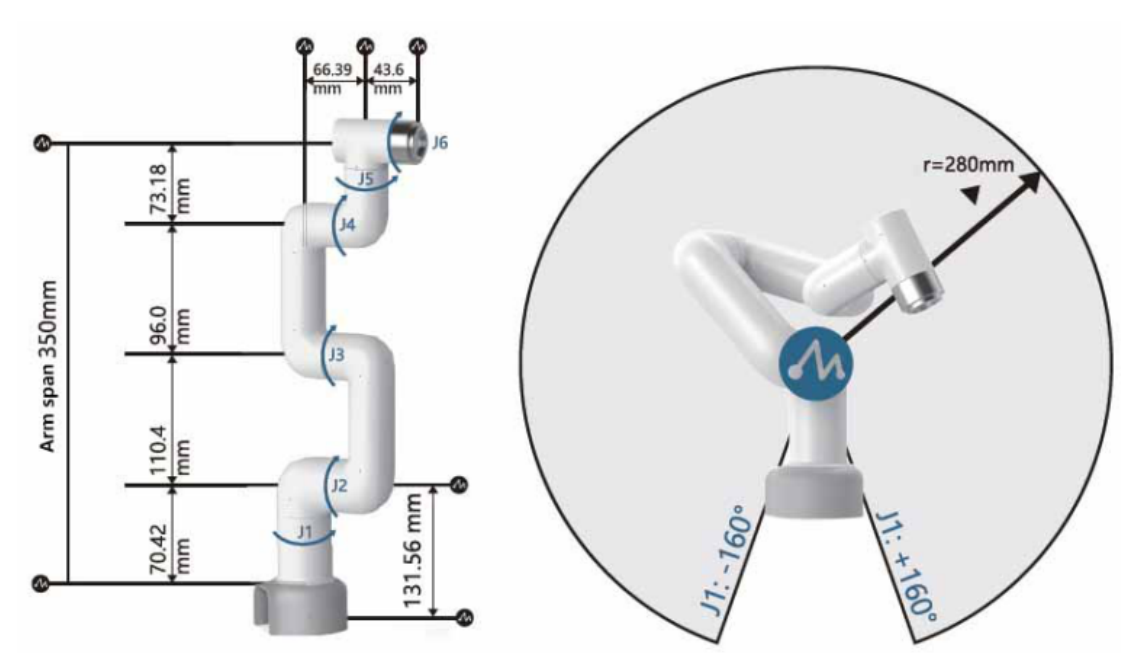

In [11]:
#read the data adult.csv
file = 'Coordinates.csv'
df = pd.read_csv(file)

In [12]:
Bins = df.set_index(["Bin_Type"]) # set the bin types as index

In [13]:
@interact
def sumGroup(position = (0,7)):
    return Bins.loc[Bins["Position"]==position]

interactive(children=(IntSlider(value=3, description='position', max=7), Output()), _dom_classes=('widget-inte…